In [1]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import astropy
from astropy.table import Table,Column,hstack
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo

In [2]:
print(tf.__version__)

2.3.0


In [3]:
def format_df(table,columns,values):
    for n,col in enumerate(columns):
        mask = table[col]==values[n]
        table[col][mask] = np.nan
    

    table = table.to_pandas()

    return(table)

In [4]:
def optical_size(cat,bands):
    apertures = [2,3,6]

    for band in bands:
        print(band)
        for aper in apertures:
            name = 'MAG_APER_{}_'.format(band)
            size = cat[name+'{}'.format(aper)] - cat[name+'1']
            col_size = Column(name='size_{}_{}-1'.format(band,aper),data=size)
            
            dist = cosmo.luminosity_distance(cat['Z_BEST']).to(u.m).value
            area = (size*dist)**2
            col_area = Column(name='area_{}_{}-1'.format(band,aper),data=area)
            
            sfrd = cat['SFR_bayes'].data/area.data
            col_sfrd = Column(name='sfrd_{}_{}-1'.format(band,aper),data=sfrd)
            
            cat.add_columns([col_size,col_area,col_sfrd])
            
    return(cat)

In [5]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    #plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

In [6]:
optical_en1 = Table.read('../lofar/data/EN1_MASTER_opt_spitzer_merged_cedit_apcorr.fits')
print(len(optical_en1))
optical_en1[0]

2105220


NUMBER,SNR_WIN,BACKGROUND,THRESHOLD,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,X2_IMAGE,Y2_IMAGE,XY_IMAGE,X2_WORLD,Y2_WORLD,A_IMAGE,B_IMAGE,THETA_IMAGE,ERRA_IMAGE,ERRB_IMAGE,ERRTHETA_IMAGE,FLAGS_i,CLASS_STAR,FLAGS_J,FLAGS_K,FLAGS_g,FLAGS_hscg,FLAGS_hsci,FLAGS_hscnb921,FLAGS_hscr,FLAGS_hscy,FLAGS_hscz,FLAGS_r,FLAGS_se1,FLAGS_se2,FLAGS_sw1,FLAGS_sw2,FLAGS_sw3,FLAGS_sw4,FLAGS_u,FLAGS_y,FLAGS_z,flag_clean,NUMBER_OPTICAL,NUMBER_SPITZER,MAG_APER_sw4_1,MAG_APER_sw4_2,MAG_APER_sw4_3,MAG_APER_sw4_4,MAG_APER_sw4_5,MAG_APER_sw4_6,MAG_APER_sw4_7,MAG_APER_sw4_10,MAGERR_APER_sw4_1,MAGERR_APER_sw4_2,MAGERR_APER_sw4_3,MAGERR_APER_sw4_4,MAGERR_APER_sw4_5,MAGERR_APER_sw4_6,MAGERR_APER_sw4_7,MAGERR_APER_sw4_10,FLUX_APER_sw4_1,FLUX_APER_sw4_2,FLUX_APER_sw4_3,FLUX_APER_sw4_4,FLUX_APER_sw4_5,FLUX_APER_sw4_6,FLUX_APER_sw4_7,FLUX_APER_sw4_10,FLUXERR_APER_sw4_1,FLUXERR_APER_sw4_2,FLUXERR_APER_sw4_3,FLUXERR_APER_sw4_4,FLUXERR_APER_sw4_5,FLUXERR_APER_sw4_6,FLUXERR_APER_sw4_7,FLUXERR_APER_sw4_10,MAG_APER_sw1_1,MAG_APER_sw1_2,MAG_APER_sw1_3,MAG_APER_sw1_4,MAG_APER_sw1_5,MAG_APER_sw1_6,MAG_APER_sw1_7,MAG_APER_sw1_10,MAGERR_APER_sw1_1,MAGERR_APER_sw1_2,MAGERR_APER_sw1_3,MAGERR_APER_sw1_4,MAGERR_APER_sw1_5,MAGERR_APER_sw1_6,MAGERR_APER_sw1_7,MAGERR_APER_sw1_10,FLUX_APER_sw1_1,FLUX_APER_sw1_2,FLUX_APER_sw1_3,FLUX_APER_sw1_4,FLUX_APER_sw1_5,FLUX_APER_sw1_6,FLUX_APER_sw1_7,FLUX_APER_sw1_10,FLUXERR_APER_sw1_1,FLUXERR_APER_sw1_2,FLUXERR_APER_sw1_3,FLUXERR_APER_sw1_4,FLUXERR_APER_sw1_5,FLUXERR_APER_sw1_6,FLUXERR_APER_sw1_7,FLUXERR_APER_sw1_10,MAG_APER_sw3_1,MAG_APER_sw3_2,MAG_APER_sw3_3,MAG_APER_sw3_4,MAG_APER_sw3_5,MAG_APER_sw3_6,MAG_APER_sw3_7,MAG_APER_sw3_10,MAGERR_APER_sw3_1,MAGERR_APER_sw3_2,MAGERR_APER_sw3_3,MAGERR_APER_sw3_4,MAGERR_APER_sw3_5,MAGERR_APER_sw3_6,MAGERR_APER_sw3_7,MAGERR_APER_sw3_10,FLUX_APER_sw3_1,FLUX_APER_sw3_2,FLUX_APER_sw3_3,FLUX_APER_sw3_4,FLUX_APER_sw3_5,FLUX_APER_sw3_6,FLUX_APER_sw3_7,FLUX_APER_sw3_10,FLUXERR_APER_sw3_1,FLUXERR_APER_sw3_2,FLUXERR_APER_sw3_3,FLUXERR_APER_sw3_4,FLUXERR_APER_sw3_5,FLUXERR_APER_sw3_6,FLUXERR_APER_sw3_7,FLUXERR_APER_sw3_10,MAG_APER_sw2_1,MAG_APER_sw2_2,MAG_APER_sw2_3,MAG_APER_sw2_4,MAG_APER_sw2_5,MAG_APER_sw2_6,MAG_APER_sw2_7,MAG_APER_sw2_10,MAGERR_APER_sw2_1,MAGERR_APER_sw2_2,MAGERR_APER_sw2_3,MAGERR_APER_sw2_4,MAGERR_APER_sw2_5,MAGERR_APER_sw2_6,MAGERR_APER_sw2_7,MAGERR_APER_sw2_10,FLUX_APER_sw2_1,FLUX_APER_sw2_2,FLUX_APER_sw2_3,FLUX_APER_sw2_4,FLUX_APER_sw2_5,FLUX_APER_sw2_6,FLUX_APER_sw2_7,FLUX_APER_sw2_10,FLUXERR_APER_sw2_1,FLUXERR_APER_sw2_2,FLUXERR_APER_sw2_3,FLUXERR_APER_sw2_4,FLUXERR_APER_sw2_5,FLUXERR_APER_sw2_6,FLUXERR_APER_sw2_7,FLUXERR_APER_sw2_10,MAG_APER_se2_1,MAG_APER_se2_2,MAG_APER_se2_3,MAG_APER_se2_4,MAG_APER_se2_5,MAG_APER_se2_6,MAG_APER_se2_7,MAG_APER_se2_10,MAGERR_APER_se2_1,MAGERR_APER_se2_2,MAGERR_APER_se2_3,MAGERR_APER_se2_4,MAGERR_APER_se2_5,MAGERR_APER_se2_6,MAGERR_APER_se2_7,MAGERR_APER_se2_10,FLUX_APER_se2_1,FLUX_APER_se2_2,FLUX_APER_se2_3,FLUX_APER_se2_4,FLUX_APER_se2_5,FLUX_APER_se2_6,FLUX_APER_se2_7,FLUX_APER_se2_10,FLUXERR_APER_se2_1,FLUXERR_APER_se2_2,FLUXERR_APER_se2_3,FLUXERR_APER_se2_4,FLUXERR_APER_se2_5,FLUXERR_APER_se2_6,FLUXERR_APER_se2_7,FLUXERR_APER_se2_10,MAG_APER_se1_1,MAG_APER_se1_2,MAG_APER_se1_3,MAG_APER_se1_4,MAG_APER_se1_5,MAG_APER_se1_6,MAG_APER_se1_7,MAG_APER_se1_10,MAGERR_APER_se1_1,MAGERR_APER_se1_2,MAGERR_APER_se1_3,MAGERR_APER_se1_4,MAGERR_APER_se1_5,MAGERR_APER_se1_6,MAGERR_APER_se1_7,MAGERR_APER_se1_10,FLUX_APER_se1_1,FLUX_APER_se1_2,FLUX_APER_se1_3,FLUX_APER_se1_4,FLUX_APER_se1_5,FLUX_APER_se1_6,FLUX_APER_se1_7,FLUX_APER_se1_10,FLUXERR_APER_se1_1,FLUXERR_APER_se1_2,FLUXERR_APER_se1_3,FLUXERR_APER_se1_4,FLUXERR_APER_se1_5,FLUXERR_APER_se1_6,FLUXERR_APER_se1_7,FLUXERR_APER_se1_10,MAG_APER_y_1,MAG_APER_y_2,MAG_APER_y_3,MAG_APER_y_4,MAG_APER_y_5,MAG_APER_y_6,MAG_APER_y_7,MAG_APER_y_10,MAGERR_APER_y_1,MAGERR_APER_y_2,MAGERR_APER_y_3,MAGERR_APER_y_4,MAGERR_APER_y_5,MAGERR_APER_y_6,MAGERR_APER_y_7,MAGERR_APER_y_10,FLUX_APER_y_1,FLUX_APER_y_2,FLUX_APER_y_3,FLUX

In [7]:
lofar_sed_en1 = Table.read('../lofar/data/lofar_sed_en1.fits')
print(len(lofar_sed_en1))
columns = ['Mass_median','SFR_bayes']
values = [1E20,1E30]

'''mask = lofar_sed_en1['Mass_median']==1E20
lofar_sed_en1['Mass_median'][mask] = np.nan

mask = lofar_sed_en1['SFR_bayes']==1E20
lofar_sed_en1['SFR_bayes'][mask] = np.nan
lofar_sed_en1['SFR_bayes'] = np.log10(lofar_sed_en1['SFR_bayes']/3.8E26)

#lofar_sed_en1 = format_df(lofar_sed_en1,columns,values)
lofar_sed_en1 = lofar_sed_en1.to_pandas()'''

31602


"mask = lofar_sed_en1['Mass_median']==1E20\nlofar_sed_en1['Mass_median'][mask] = np.nan\n\nmask = lofar_sed_en1['SFR_bayes']==1E20\nlofar_sed_en1['SFR_bayes'][mask] = np.nan\nlofar_sed_en1['SFR_bayes'] = np.log10(lofar_sed_en1['SFR_bayes']/3.8E26)\n\n#lofar_sed_en1 = format_df(lofar_sed_en1,columns,values)\nlofar_sed_en1 = lofar_sed_en1.to_pandas()"

In [8]:
lofar_magphys_en1 = Table.read('../lofar/data/magphys_mass_radio_limits_en1.fits')
#mask = lofar_magphys_en1['q_lim']==1E20
#lofar_magphys_en1['q_lim'][mask] = np.nan
print(len(lofar_magphys_en1))
lofar_magphys_en1 = lofar_magphys_en1.to_pandas()


146996


In [9]:
#create a mask to select a sample that is complete in stellar mass and redshift
#for a mass complete sample at z<1.0 Mstar>10.7
mask_loc = (lofar_sed_en1['RA']>242.5) & (lofar_sed_en1['RA']<243.5) & (lofar_sed_en1['DEC']>54) & (lofar_sed_en1['DEC']<56) 
mask_mass_complete_en1 = (lofar_sed_en1['Z_BEST']<1.0) & (lofar_sed_en1['Mass_median']>10.7)# & mask_loc
agn_mask = lofar_sed_en1['AGN_final'].astype(bool) | lofar_sed_en1['RadioAGN_final'].astype(bool)
SSFR_mask = (np.log10(lofar_sed_en1['SFR_bayes']) - lofar_sed_en1['Mass_median'] - np.log10(3.8*10**26))>-10.5
detected_sample_en1 = lofar_sed_en1[mask_mass_complete_en1 & ~agn_mask & SSFR_mask]
print('There are {} galaxies detected in the radio with a stellar mass>10.7 and z<1'.format(len(detected_sample_en1)))



mask_loc = (lofar_magphys_en1['RA']>242.5) & (lofar_magphys_en1['RA']<243.5) & (lofar_magphys_en1['DEC']>54) & (lofar_magphys_en1['DEC']<56)
mask_mass_complete_limit_en1 = (lofar_magphys_en1['Z_BEST']<1.0) & (lofar_magphys_en1['Mass_median']>10.7)# & mask_loc
SSFR_mask = (np.log10(lofar_magphys_en1['SFR_bayes']) - lofar_magphys_en1['Mass_median'])>-10.5
limit_sample_en1 = lofar_magphys_en1[mask_mass_complete_limit_en1 & SSFR_mask]
print('There are {} galaxies with only a Ldust measurement with a stellar mass>10.7 and z<1'.format(len(limit_sample_en1)))

There are 3935 galaxies detected in the radio with a stellar mass>10.7 and z<1
There are 5240 galaxies with only a Ldust measurement with a stellar mass>10.7 and z<1


/its/home/im281/.conda/envs/keras/lib/python3.7/site-packages/astropy/table/column.py:1152: RuntimeWarning: invalid value encountered in less
  result = getattr(super(), op)(other)
/its/home/im281/.conda/envs/keras/lib/python3.7/site-packages/astropy/table/column.py:1152: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


In [10]:
#match the flux catalogue to the radio catalogue
ras = detected_sample_en1['RA']#*u.degree
decs = detected_sample_en1['DEC']#.data*u.degree
radio_coords = SkyCoord(ra=ras,dec=decs,unit=u.degree)

ras = optical_en1['ALPHA_J2000']
decs = optical_en1['DELTA_J2000']
optical_coords = SkyCoord(ra=ras,dec=decs)

idx,d2d,_ = radio_coords.match_to_catalog_sky(optical_coords)

radio_optical_cat = hstack([detected_sample_en1,optical_en1[idx]])

In [11]:
mask = radio_optical_cat['Mass_median']==1E20
radio_optical_cat['Mass_median'][mask] = np.nan

mask = radio_optical_cat['SFR_bayes']==1E20
radio_optical_cat['SFR_bayes'][mask] = np.nan
radio_optical_cat['SFR_bayes'] = np.log10(radio_optical_cat['SFR_bayes']/3.8E26)

#create the label column which is the deviation of q from the sample median
col = Column(name='delta_q',data=radio_optical_cat['q_magphys']-1.879)
radio_optical_cat.add_column(col)
#radio_optical_cat = radio_optical_cat.to_pandas()

In [12]:
#create columns containing features

#sSFR  - not / because the columns are already logged
sSFR = radio_optical_cat['SFR_bayes']-radio_optical_cat['Mass_median']
col_ssfr = Column(name='sSFR',data=sSFR)

#radio size, taken as total/peak
radio_size = radio_optical_cat['Total_flux']/radio_optical_cat['Peak_flux']
col_rad_size = Column(name='radio_size',data=radio_size)

#optical size, taken as 2"-1", 3"-1" and 6"-1"
bands = ['r','J']
optical_size(radio_optical_cat,bands)


#optical sizes, taken as the ratio of different aperture fluxes
radio_optical_cat.add_columns([col_ssfr,col_rad_size])

r
J


In [13]:
size_cols = [name for name in radio_optical_cat.columns if 'size' in name]
area_cols = [name for name in radio_optical_cat.columns if 'area' in name]
sfrd_cols = [name for name in radio_optical_cat.columns if 'sfrd' in name]
features = ['Mass_median','SFR_bayes','Z_BEST','sSFR','delta_q'] + size_cols + sfrd_cols

radio_optical_cat = radio_optical_cat[features].to_pandas()

train_data = radio_optical_cat[features].sample(frac=0.8)
test_data = radio_optical_cat[features].drop(train_data.index)

train_labels = train_data.pop('delta_q')
test_labels = test_data.pop('delta_q')

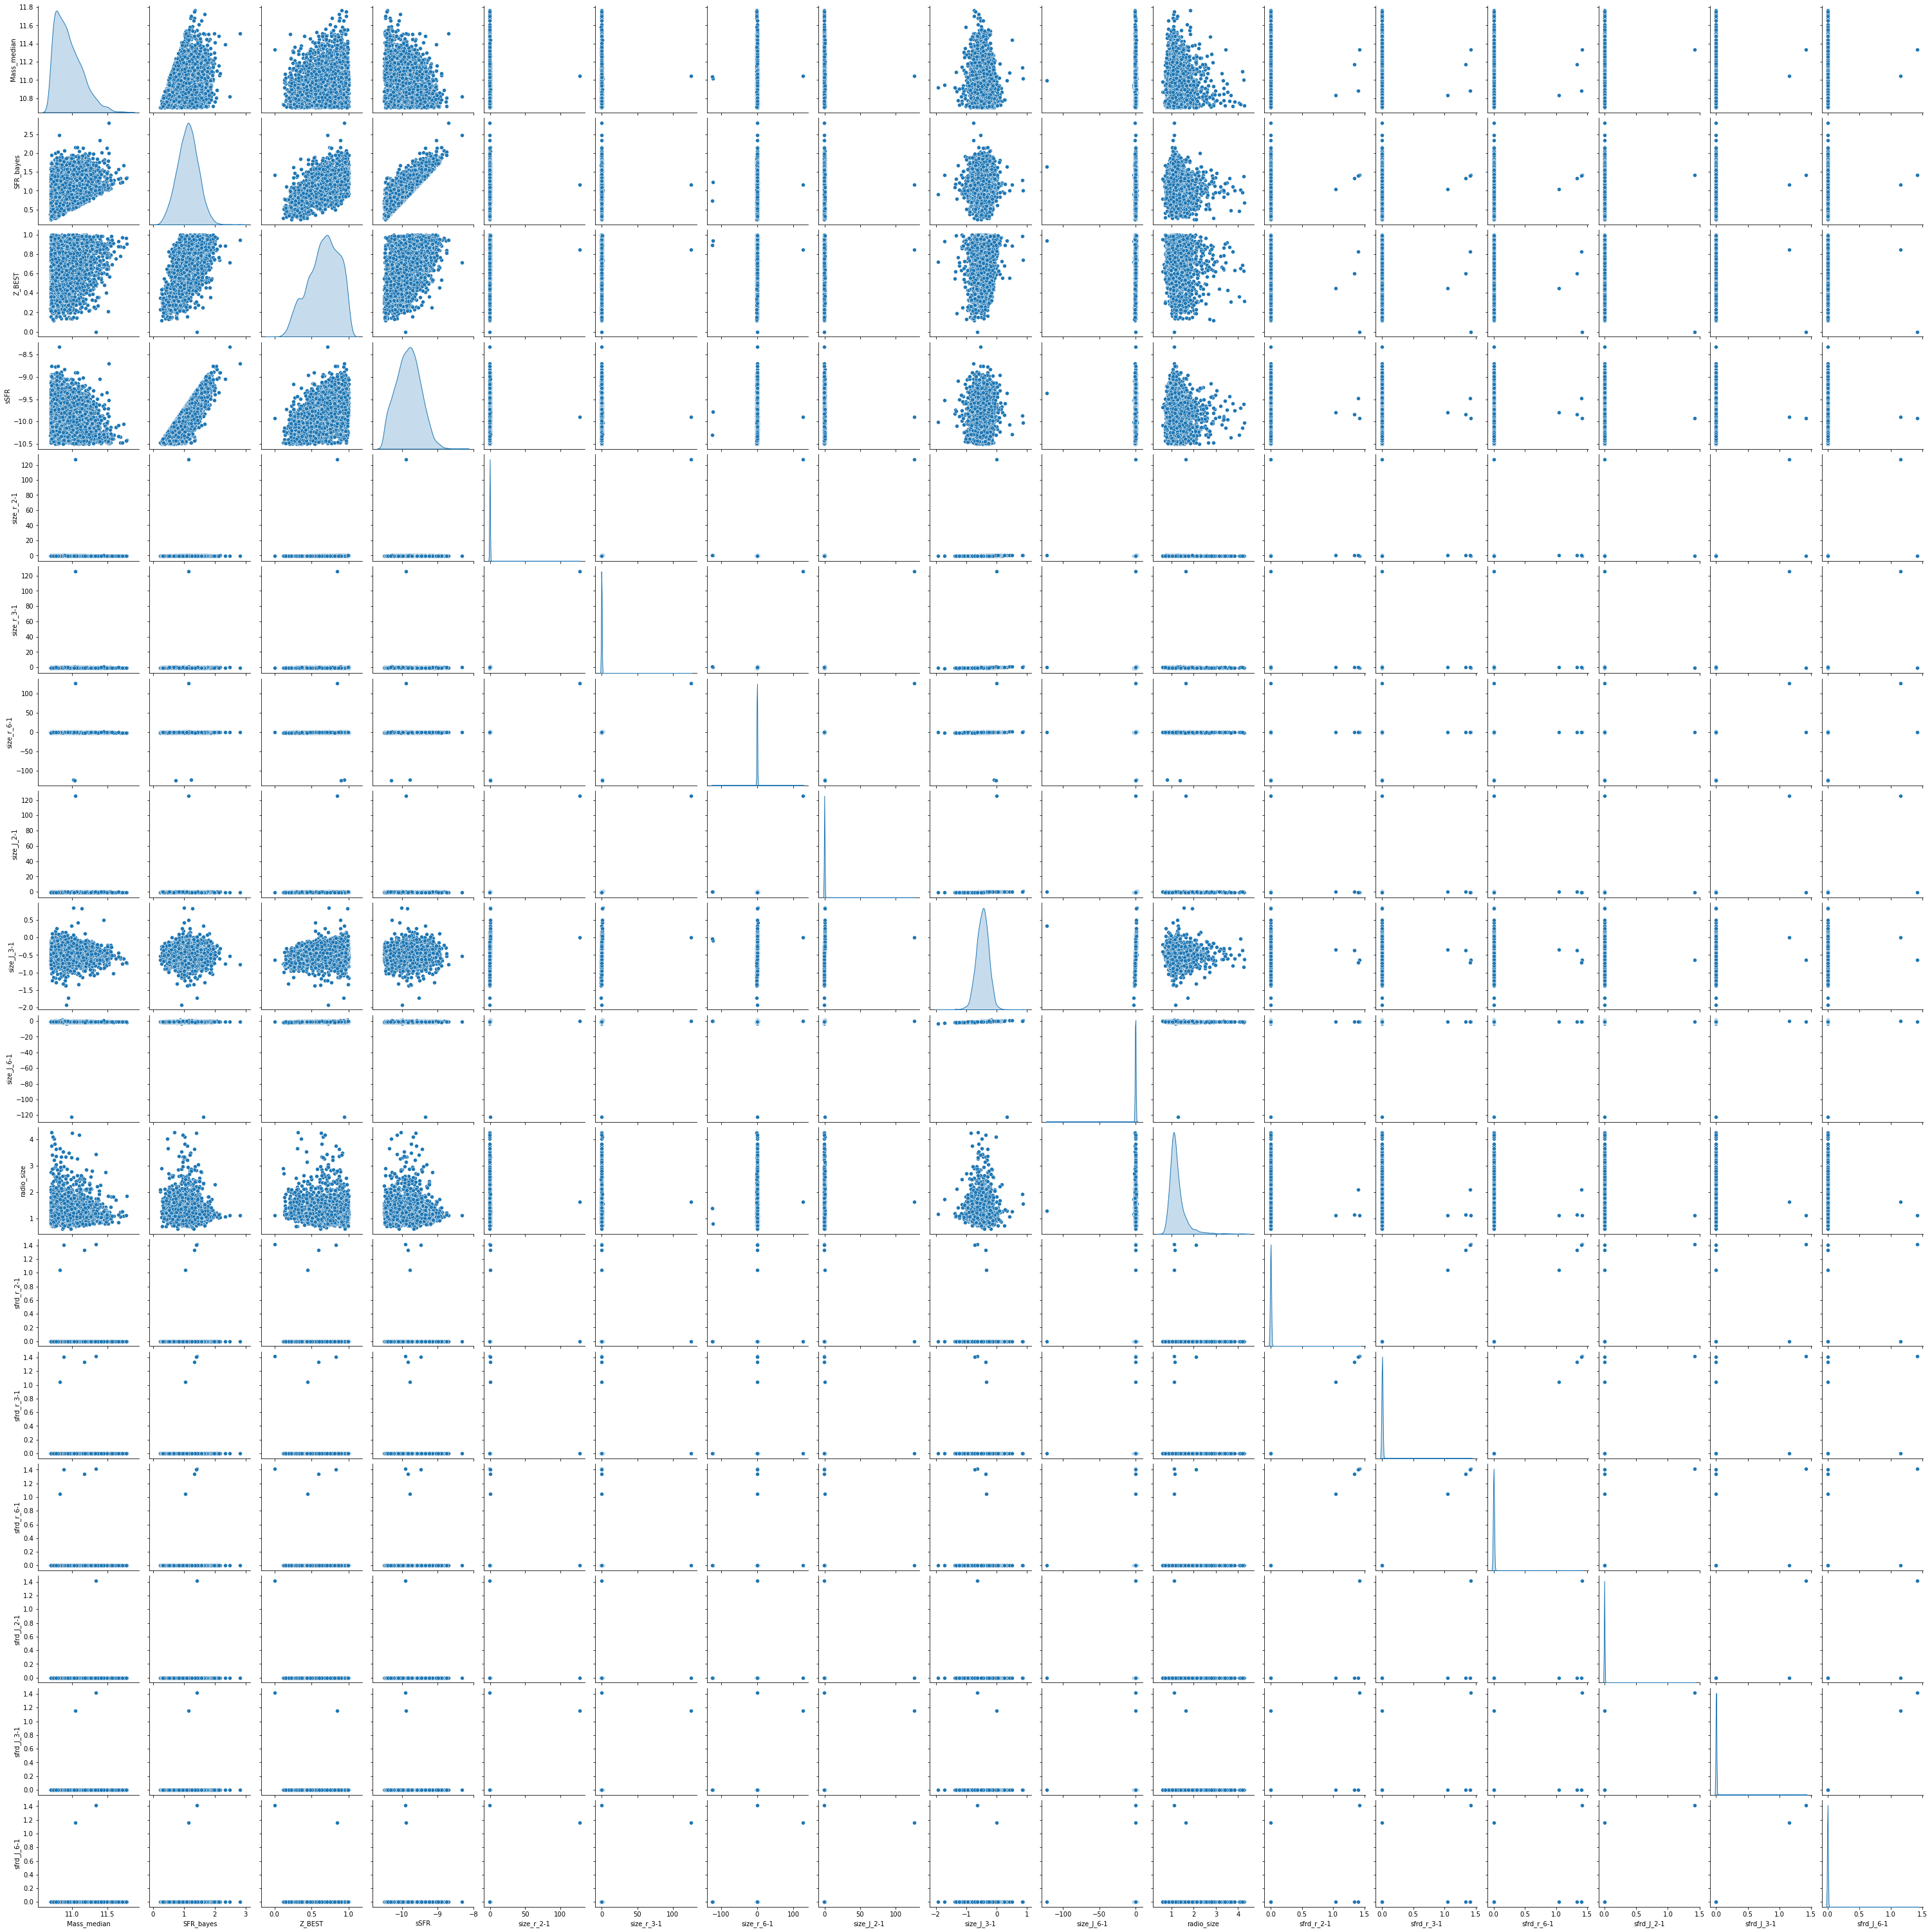

In [14]:
sns.pairplot(train_data,diag_kind='kde')

In [15]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_data))
print(normalizer.mean.numpy())

[ 1.0952801e+01  1.1253966e+00  6.6226763e-01 -9.8274040e+00
 -2.0077495e-01 -4.1309083e-01 -7.0794845e-01 -2.3113646e-01
 -4.7078443e-01 -6.6512781e-01  1.2437198e+00  1.6530132e-03
  1.6530132e-03  1.6530132e-03  4.5017991e-04  8.1767299e-04
  8.1767299e-04]


In [16]:
first = np.array(train_data[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[10.85  0.9   0.33 -9.95 -0.35 -0.67 -1.03 -0.34 -0.64 -0.97  1.07  0.
   0.    0.    0.    0.    0.  ]]

Normalized: [[-0.55 -0.67 -1.64 -0.36 -0.07 -0.11 -0.08 -0.05 -0.83 -0.14 -0.46 -0.04
  -0.04 -0.04 -0.02 -0.03 -0.03]]


In [17]:
SFR = np.array(train_data['SFR_bayes'])

SFR_normalizer = preprocessing.Normalization(input_shape=[1,])
SFR_normalizer.adapt(SFR)

SFR_model = tf.keras.Sequential([
    SFR_normalizer,
    layers.Dense(units=1)
])

SFR_model.summary()

SFR_model.predict(SFR[:10])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


array([[-0.85082686],
       [ 0.74194425],
       [-1.8376182 ],
       [-0.6479597 ],
       [ 1.1000926 ],
       [ 1.1186544 ],
       [-0.32857573],
       [ 2.4344597 ],
       [-1.1880625 ],
       [ 0.2763077 ]], dtype=float32)

In [18]:
SFR_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history = SFR_model.fit(
    train_data['SFR_bayes'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

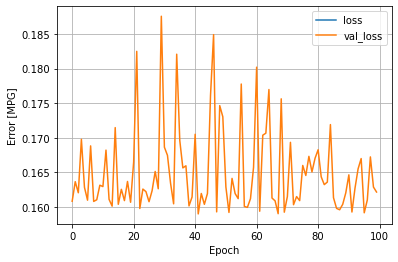

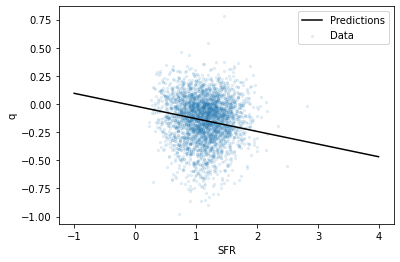

In [19]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

plot_loss(history)
plt.show()

test_results = {}

test_results['SFR_model'] = SFR_model.evaluate(
    test_data['SFR_bayes'],
    test_labels, verbose=0)

x = np.arange(-1,4,0.01)
y = SFR_model.predict(x)

def plot_SFR(x, y):
    plt.scatter(train_data['SFR_bayes'], train_labels, label='Data',alpha=0.1,s=5)
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('SFR')
    plt.ylabel('q')
    plt.legend()
    
plot_SFR(x,y)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 17)                35        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 18        
Total params: 53
Trainable params: 18
Non-trainable params: 35
_________________________________________________________________


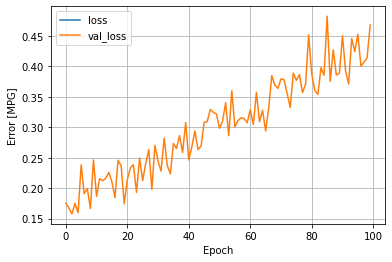

In [20]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

linear_model.summary()

linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history = linear_model.fit(
    train_data, train_labels, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

plot_loss(history)

In [21]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 17)                35        
_________________________________________________________________
dense_2 (Dense)              (None, 64)                1152      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 5,412
Trainable params: 5,377
Non-trainable params: 35
_________________________________________________________________


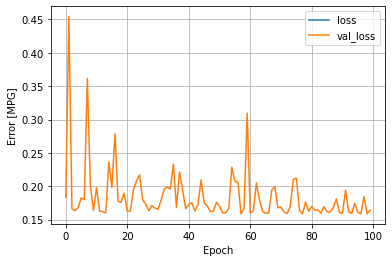

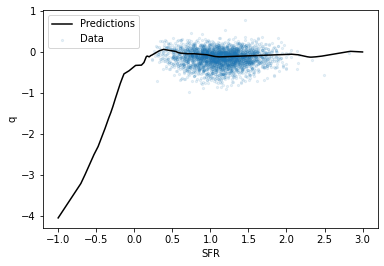

In [22]:
dnn_q_model = build_and_compile_model(normalizer)
dnn_q_model.summary()

history = dnn_q_model.fit(
    train_data['SFR_bayes'], train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)
plt.show()

x = np.arange(-1, 3, 0.001)
y = dnn_q_model.predict(x)

plot_SFR(x, y)

In [23]:
test_results['dnn_q_model'] = dnn_q_model.evaluate(
    test_data['SFR_bayes'], test_labels,
    verbose=0)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 17)                35        
_________________________________________________________________
dense_5 (Dense)              (None, 64)                1152      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 5,412
Trainable params: 5,377
Non-trainable params: 35
_________________________________________________________________


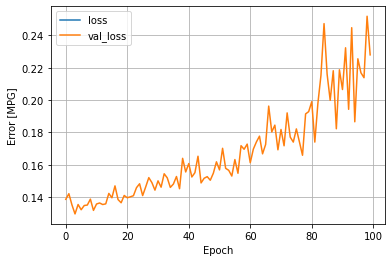

In [24]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

history = dnn_model.fit(
    train_data, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

plot_loss(history)

test_results['dnn_model'] = dnn_model.evaluate(test_data, test_labels, verbose=0)

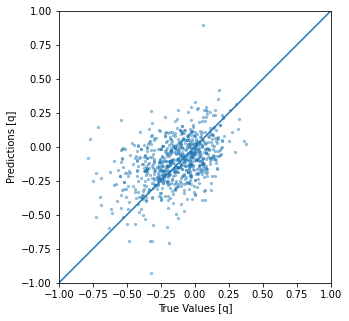

In [38]:
test_predictions = dnn_model.predict(test_data).flatten()
fig = plt.figure(figsize=[5,5])
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions,s=5,alpha=0.4)
plt.xlabel('True Values [q]')
plt.ylabel('Predictions [q]')
lims = [-1, 1]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)
plt.show()

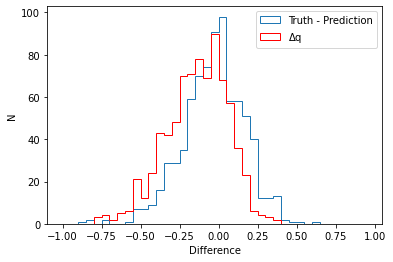

In [34]:
y = test_labels - test_predictions
bins = np.arange(-1,1,0.05)
plt.hist(y,bins=bins,histtype='step',label='Truth - Prediction')
plt.hist(test_labels,bins=bins,histtype='step',color='red',label='$\Delta$q')
plt.xlabel('Difference')
plt.ylabel('N')
plt.legend()
plt.show()